# Logistics
Assignment 3 - Part 2

Name: Sayan Ray

Roll: 213230011

# K-Means Clustering .


---



# Importing The required packages.

In [1]:
# This pacakage is for the K-means clustering
from sklearn.cluster import KMeans

# These are standard imports
import numpy as np
import pandas as pd
from scipy import stats 

# For plotting and visualization
from matplotlib import pyplot as plt
import seaborn as sns

# For Normalizing and bringing data to mean 0 and s.d. ±1 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# These are required for TSNE and davies bouldin score
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score

# Loading the dataset


#Loading the dataset in a dataframe named 'cluster_train_df'.

In [2]:
# Link of the dataset is 'https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv'
cluster_train_df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv')
print (cluster_train_df)

           x1        x2        x3        x4
0    0.832354  1.389428  0.962226  0.993671
1    1.256087  1.500487  0.904118  0.738035
2    0.976953  1.058524  1.217530  1.357238
3    1.014365  1.122684  1.195847  0.984144
4    1.041386  1.219014  0.864819  1.720825
..        ...       ...       ...       ...
346  0.203877  0.195724  2.766999  1.826532
347  0.229380  0.131514  0.704255  2.762919
348  0.095878  0.107426  0.946789  3.434620
349  0.111690  0.130970  1.098922  2.295701
350  0.113965  0.283822  1.318260  1.494283

[351 rows x 4 columns]




---


# Exploratory Data Analysis




In [3]:
# This part is inspired from Amit Sir's Lecuture on ML for Smart Monkeys
# I am checking for the unique values and features with missing entities

# c is just the counter of the features.
c = 1

for col in cluster_train_df.columns.values:
  list_vals = pd.unique(cluster_train_df[col])
  
  # So isnull() scans the missing values and then we sum it up.
  print(str(c) +". "+col + " is of type " + str(cluster_train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(cluster_train_df[col].isnull().sum(axis=0)) + " null entries")
  c = c + 1
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:-1])

1. x1 is of type float64 has 351 unique values, and 0 null entries
2. x2 is of type float64 has 351 unique values, and 0 null entries
3. x3 is of type float64 has 351 unique values, and 0 null entries
4. x4 is of type float64 has 351 unique values, and 0 null entries


So, its pretty clear that 
1. Each feature is of a continous numeric type and has no null entries.
2. Each feature has 100% unuque values, so no duplicate values.

As I learned from : https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932#:~:text=Real%2Dworld%20data%20usually%20is,is%20to%20handle%20these%20issues.

We need to maintain that.


1.   There has to be Numerical variables only.
2.   The Data must have no noises or outliers.
3.   The Data has symmetric distribution of variables (if it is skewed ,we need to treat it with transformations).
4.   Variables on the same scale (In the range -1 to +1).
5.   There is no collinearity or in other words correlation.
6.   Minimum featues as much as possible are used





#Correlation Map

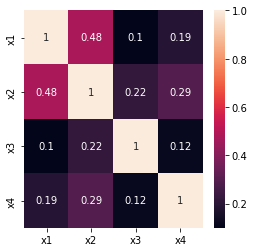

In [4]:
# So I'll be using the most commonly used correlation methon, Pearson's Correlation 
corr_pearson = cluster_train_df.corr(method= 'pearson')

#Now making a heatmap out of it.
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(abs(corr_pearson), annot = True)
plt.show()

There is no appreciable correlation between two variables as seen from above. A max its 0.48 which is lesser than 0.5 so a low correlation can be ignored.

# The distribution of the variables are

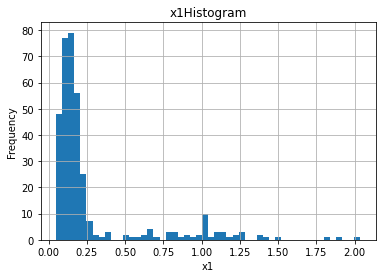

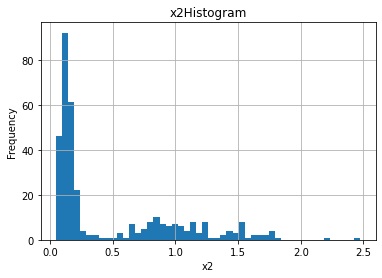

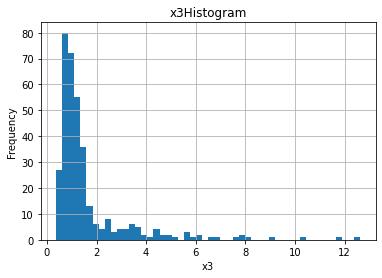

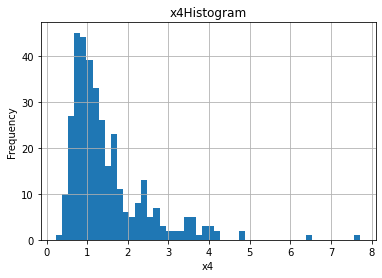

In [5]:
#To visualize the variables since all are continous we are creating histograms to understand their distribution
# So now taking all the features and checking their histograms

for feature in cluster_train_df.columns.values:
    # I chose bin size 50 since it helped me visialize the shape easier.
    cluster_train_df[feature].hist(bins=50)

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.title(feature + "Histogram")
    plt.show()
    print()

# Observations :
- Its all positively skewed with outliers. What we need is a log transformation. 

- Data is all positive.

#Transforming the data

In [6]:
transformed_data = np.log10(cluster_train_df)

#Now checking how its distribution looks like after log base 10 transformation.

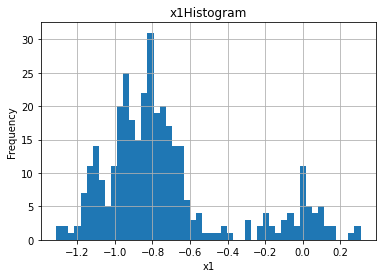

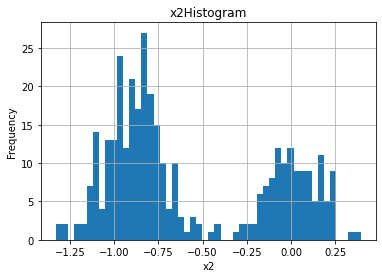

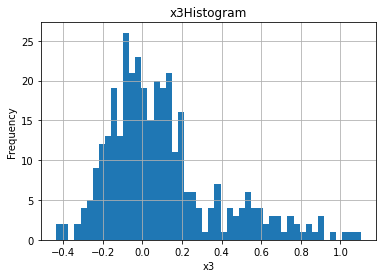

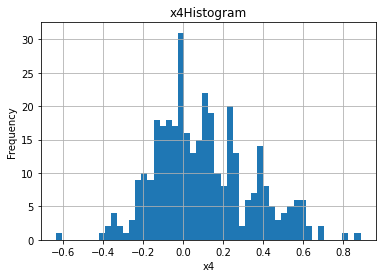

In [7]:
for feature in transformed_data.columns.values:
    # I chose bin size 50 since it helped me visialize the shape easier.
    transformed_data[feature].hist(bins=50)

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.title(feature + "Histogram")
    plt.show()
    print()

# Scaling the data.

In [8]:
scaled_data_array = ss.fit_transform(transformed_data)

# We need to reconstruct the dataframe
col = transformed_data.columns.values

# The dataframe after scaling the data
# Note that, I am just considering the same name althoug they mean different things xi and log10(xi), but I am using it as an indicator on the dimension
scaled_data = pd.DataFrame(scaled_data_array, columns=col)

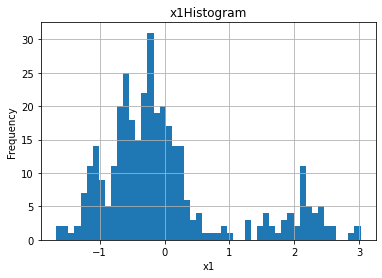

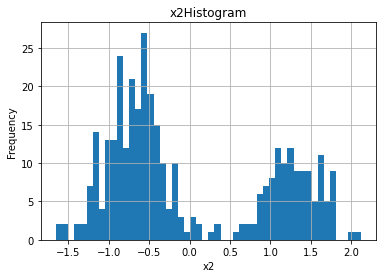

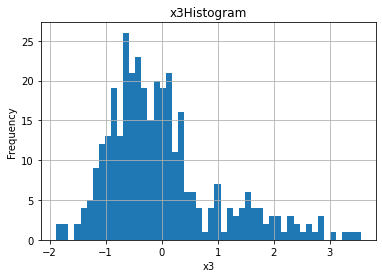

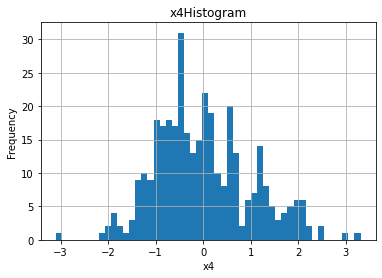

In [9]:
for feature in scaled_data.columns.values:
    # I chose bin size 50 since it helped me visialize the shape easier.
    scaled_data[feature].hist(bins=50)

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.title(feature + "Histogram")
    plt.show()
    print()

# The Scatter plots of the 

Plotting x1 VS x2


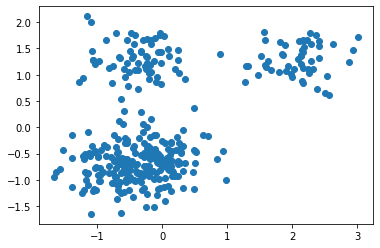


Plotting x1 VS x3


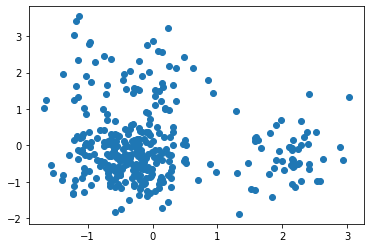


Plotting x1 VS x4


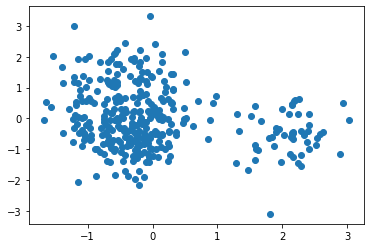


Plotting x2 VS x3


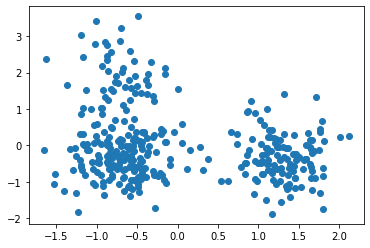


Plotting x2 VS x4


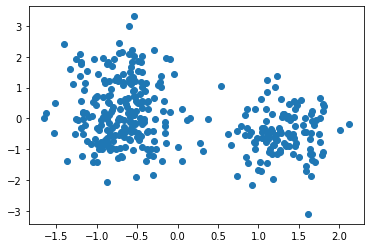


Plotting x3 VS x4


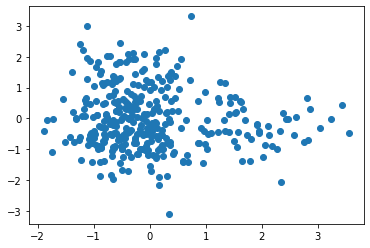

In [10]:
# This section is a simple pairwise scatter plot generator
features = scaled_data.columns
for i in range(4):
  for j in range(i+1,4):
    print ("Plotting "+features[i]+" VS "+features[j])
    plt.scatter(scaled_data[features[i]], scaled_data[features[j]], marker = 'o')
    plt.show()
    print()  

# Now to remove the outliers.

From https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/#:~:text=Three%20standard%20deviations%20from%20the,99.9%25)%20can%20be%20used.

I got that " Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used. "

Since the dataset is small i.e. 351  ( not even in thousands ) I will keep s.d. * 3 as the cutoff to remove outliers.

I borrowed the techniquie to remove entire rows from dataframe based on outliers from https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [11]:
clean_data_array = scaled_data_array[(np.abs(stats.zscore(scaled_data_array)) < 3).all(axis=1)]
clean_data = pd.DataFrame(clean_data_array, columns=col)

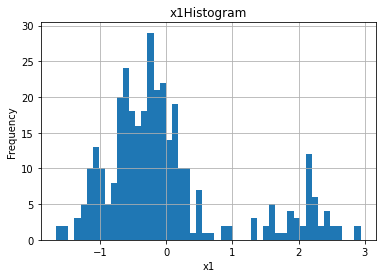

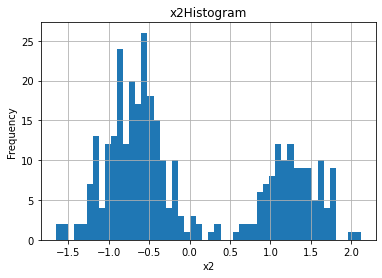

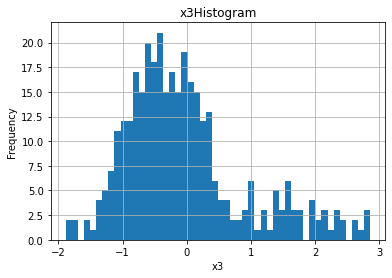

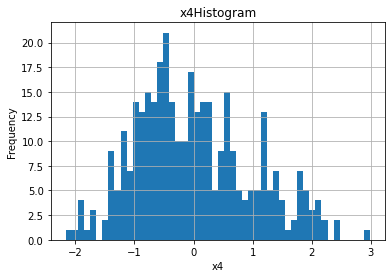

In [12]:
for feature in clean_data.columns.values:
    # I chose bin size 50 since it helped me visialize the shape easier.
    clean_data[feature].hist(bins=50)

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.title(feature + "Histogram")
    plt.show()
    print()

# This looks good enough to move on to clustering.

 # Now we need to use Davies-Bouldin Index for various clusters. The minimum of those values give us the best value of k we consider for k-means clusters.

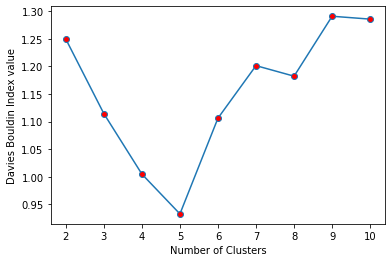

In [13]:
# To plot the Elbow plots we need to store the MSEs for each cluster.
dbi_arr = []

# This is the number of possible clusters so starting from 2 cluster to 10 clusters.
k_values = range(2,11)
for i in k_values:
  
  # Preparing the model with the number of clusters  = i
  kmi = KMeans(n_clusters=i).fit(clean_data)

  # We need the labels for Daves Bouldin Index function in sklearn library
  labels = kmi.labels_

  # The index for i clusters is :
  dbi_val = davies_bouldin_score(clean_data, labels)
  
  dbi_arr.append(dbi_val)

plt.ylabel('Davies Bouldin Index value')
plt.xlabel('Number of Clusters')
plt.plot(k_values,dbi_arr,marker = 'o',markerfacecolor = 'red')

# Quite evidently, 5 clusters is what we should go for.

 # Now I am using Elbow curve for cross verifying the cluster number (k) found in Davies Boulden Index.

 I learned how to generate the elbow curve using cluster sum of squared error : https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

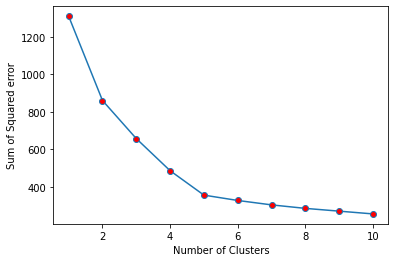

In [14]:
# In order to calculate mean squared error we need the total size
size = clean_data.shape[0] # Number of rows of the clean_data dataframe

# To plot the Elbow plots we need to store the MSEs for each cluster.
sq_err_arr = []

# This is the number of possible clusters so starting from 1 cluster to 10 clusters.
k_values = range(1,11)
for i in k_values:
  
  # Preparing the model with the number of clusters  = i
  km = KMeans(n_clusters=i)
  km.fit(clean_data)
    
  # The error is stored in the attribute named inertia_ belonging to KMeans()
  sq_err_arr.append(km.inertia_)

plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared error')
plt.plot(k_values,sq_err_arr,marker = 'o',markerfacecolor = 'red')

In [15]:
# I will check for the change of loss falling below 15% as a cutoff
percentage_change = [0]

for i in range (1,10):
  percentage_change.append(100*(sq_err_arr[i]-sq_err_arr[i-1])/sq_err_arr[i-1])

for i in range (1,10):
  print ("Error change for cluster " + str(i) +" to "+ str(i+1) + " is   "+ str(percentage_change[i])+" %")

Error change for cluster 1 to 2 is   -34.310797917216036 %
Error change for cluster 2 to 3 is   -23.614267807080157 %
Error change for cluster 3 to 4 is   -26.066017794571987 %
Error change for cluster 4 to 5 is   -26.794691766762057 %
Error change for cluster 5 to 6 is   -8.007252408608357 %
Error change for cluster 6 to 7 is   -7.20029626596626 %
Error change for cluster 7 to 8 is   -6.137949974360942 %
Error change for cluster 8 to 9 is   -5.188587207635797 %
Error change for cluster 9 to 10 is   -5.451054414557862 %


# Judging by the change rate, it seems 5 clusters are reasonable, since the change from 5 to 6 clusters is only -8% approx.



---


# Visualization


#First we need to prepare the lables for each cluster.

I got the idea to use a dictionary for colour in the embedded 2d plane from this link:

https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster

In [16]:
#For our cause we nees k=5
kmean = KMeans(n_clusters=5)
kmean.fit(clean_data)

c = 0
cluster_label = []
for i in range(size):
  while scaled_data_array[c,0] != clean_data_array[i,0]:
    cluster_label.append(5)
    c+=1
  cluster_label.append(kmean.labels_[i])
  c+=1

# Now we embed in 2d using TSNE function:

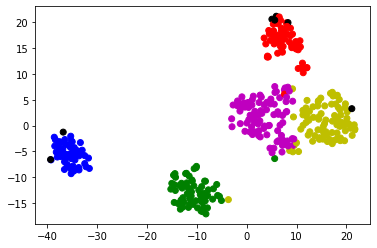

In [17]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
emb_data= tsne.fit_transform(scaled_data_array)
x_viz = emb_data[:,0]
y_viz = emb_data[:,1]

label_colour = {0 : 'r', 1 : 'g', 2 : 'b', 3 : 'y', 4 : 'm', 5 : 'k', }

label_color = [label_colour[l] for l in cluster_label]
plt.scatter(x_viz, y_viz, c=label_color)
plt.show()

#Colour and meaning:
- Cluster 1 : Red
- Cluster 2 : Green
- Cluster 3 : Blue
- Cluster 4 : Yellow
- Cluster 5 : Magenta
- Outlier   : Black

#Conclusion: 
There are a few misclassified points but except that it seems that there is a good and clean indication of the clusters' menbership. Thus we are successful.